# Forces Acting Within a Synestia

## Balance of Forces

![title](Figures/FigureGasForces.png)

<i>Caption</i>. There are three forces acting on gas in a synestia. As gas in a synestia rotates with angular velocity $\omega$, a centripetal force acts on the gas. Gravitational and pressure forces act on the gas as well. The mass of the material closest to the rotational axis will attract the gas towards the center of a synestia. However, gravitational acceleration of the gas a$_{grav}$ in z is balanced by a vertical pressure force dP/dr that acts over the local pressure gradients in the gas. Thus, there is rotational but no vertical (z) motion of the gas. Credit: S. J. Lock and G. O. Hollyday.

To understand the dynamics of a synestia, we must first understand its mechanics (balance of forces). There are three forces at work (see image above):
1. centripetal force (arises from curving motion),
2. pressure force from the gas, and
3. gravity of components of the structure.

A parcel of gas in a synestia is stably orbiting when it follows the following equation:

$$\omega^2r = \frac{1}{\rho}\frac{dP}{dr} + \frac{GM}{r^2} \left(1 - \frac{3J_2a_{eq}^2}{2r^2}\left(\frac{3z^2}{r^2} - 1\right) \right)$$
where $\omega$ is the angular velocity of the parcel, r is the distance from the parcel to the center of the synestia (origin), $\rho$ is the density of the parcel of gas, dP/dr is the radial pressure gradient at the location of the parcel, G is the gravitational constant, M is the mass of the synestia the parcel is orbiting in, J$_2$ is the oblateness of that synestia, a$_{eq}$ is the equatorial radius of this synestia, and z is the vertical distance off the midplane of the parcel of gas. In a synestia, the presence of gas everywhere and the placement of mass at extended distances in the midplane add the radial pressure gradient and gravitational J$_2$ term to the balance of forces for an orbit. For comparison, a Keplerian orbit for a spherical central mass follows:

$$\omega^2r = \frac{GM}{r^2}$$

A parcel of gas is in equilibrium when the gravitational force, pressure force, and curving motion are balanced so that the particle maintains a stable orbit. The angular velocity of a parcel of gas in equilibrium  will change according to the strength of the gravitational field and the pressure gradient surrounding it in a synestia. The gas density, gas pressure, and self-gravitation (J$_2$ gravity term) are significant forces in shaping the oblate, flared gas structure of a synestia and motion of moonlets inside a synestia.

### Gravity
Gravitational forces increase with increasing radius, increasing oblateness, and total mass. When the gravitational forces are stronger, the gas particles inside a synestia must have higher angular velocity to maintain a stable orbit.

The strongest gravitational forces will be along the midplane and closest to the center of a synestia. Both are considered equilibrium points (where a particle will settle when forces are balanced). In constrast, a  gas parcel at a greater distance from the rotation axis and farther from the midplane will experience a lower gravitational force.

### Pressure Force
The pressure force, (1/$\rho$)(dP/dr), is dependent on the synestia's vapor density and pressure gradients.

Pressure and density of the gas will vary based on the parcel's location in a synestia. There is a radial dependency for pressure and density. Pressure and density decrease off the midplane to higher z, and also decrease at larger distances (cylindrical radius, r$_{xy}$) from a synestia's rotational axis. Pressure and density follow a negative power law dependence in r$_{xy}$ and an exponential decay dependence in z.

Pressure will typically follow the form:

$$P = P(r_{xy}, z) = P_0r_{xy}^{-a}e^{-z^2/z_s^2}$$

where $P_0$ is a reference pressure in the midplane, r$_{xy}$ is the cylindrical radius of the gas parcel and makes the base of the power law fit for the midplane, a is the positive exponent of the midplane's power law fit, z is the vertical position of the parcel of gas, and z$_s$ is the <i>scale height</i>.

The scale height is a measure of how quickly the density decreases in z. The scale height is the z at which density reaches 1/e<i>th</i> of its midplane value. The scale height has a power law dependency on cylindrical radius r$_{xy}$ with the form:

$$z_s = b r_{xy}^d$$

where b is a positive coefficient and d is the positive exponent of the power law.

Similarly, density will typically follow the form:

$$\rho = \rho(r_{xy}, z) = \rho_0r_{xy}^{-f}e^{-z^2/z_s^2}$$

where $\rho_0$ is a reference density in the midplane and f is the positive exponent of the midplane's power law fit.

Essentially, gas density and pressure exponentially decay from the midplane to the photosphere (cloud layer) of a synestia, and will do so more quickly at larger distances from a synestia's rotational axis. In the midplane, gas density and pressure decrease with increasing cylindrical radius according to some power law. This shapes a synestia's pressure and density fields into nested, flared contours.

The greater the density of the gas field and the pressure differential across the gas parcel [one side of the gas particle (smaller radius) has a much stronger pressure than the other side (larger radius)], the larger the pressure support will be for an orbiting gas particle. With increased pressure support, a gas parcel can orbit stably at lower angular velocities. We call these <i>sub-Keplerian</i> orbits.

## Sub-Keplerian Orbits of Moonlets in Synestias: Balanced by Oblate Gravity and Pressure}

### Oblate Gravity Term
The Keplerian orbit of a moonlet within the (first and second order) gravity field of an Earth-mass synestia is shown in the interactive below. You can change the parameters of the Keplerian orbit. You will see how a moon travels when only a synestia's gravity (first and second order) is at play (no gas), so that we have a baseline to compare to when gas drag is taken into account. The oblateness of a synestia's gravity field is non-negligible. A synestia's gravity field has extra gravitational acceleration closest to both the midplane and center of a synestia due to the oblateness of a synestia. Notice how any orbits off the midplane are affected by the J$_2$ term in a synestia's gravity.

You may have to be patient while the plots load. If there is output but no images, re-run the notebook. If the plots do not load after 1-2 minutes, restart the notebook.

In [2]:
import rebound
from syndef import synfits #import synestia snapshot (impact database)
import numpy as np
from ipywidgets import *
import math
import matplotlib.pyplot as plt

dens = 3000. #kg/m^3
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
J2Ma2 = synfits.SNAP_Canup.J2Ma2

#from rebound.plotting import fading_line
def pltJ2(rad_moon,sma,i,ecc):
    #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim_kep = rebound.Simulation() #start simulation
    sim_kep.units = ('Hr', 'M', 'Kg') #use SI units
    sim_kep.add(m=Mass_syn) #add central body
    sim_kep.add(m=m_moon,a=sma,inc=i,e=ecc)
    sim_kep.move_to_com()
    ps_kep = sim_kep.particles
    kep_moon = ps_kep[1]
    kep_orbit = np.asarray(kep_moon.sample_orbit())
    
    sim_j2 = rebound.Simulation() #start simulation
    sim_j2.units = ('Hr', 'M', 'Kg') #use SI units
    sim_j2.min_dt = 0.001 #prevents time step from getting too small
    sim_j2.add(m=Mass_syn) #add central body
    sim_j2.add(m=m_moon,a=sma,inc=i,e=ecc)
    ps_j2 = sim_j2.particles
    
    def J2(sim_j2):
        r_orb = (ps_j2[1].x**2 + ps_j2[1].y**2 + ps_j2[1].z**2)**0.5
        costheta = ps_j2[1].z/r_orb
        grav2 = 3.0*G_hr*J2Ma2*(r_orb**(-5))
        ps_j2[1].ax -= ps_j2[1].x*grav2*( 2.5*costheta*costheta - 0.5 )
        ps_j2[1].ay -= ps_j2[1].y*grav2*( 2.5*costheta*costheta - 0.5 )
        ps_j2[1].az -= ps_j2[1].z*grav2*( 2.5*costheta*costheta - 1.5 )
    
    sim_j2.additional_forces = J2
    sim_j2.move_to_com()
    
    N = 1000 # number of integration points
    # for more inclined or eccentric orbits,
    # for larger orbits,
    # need more integration time
    if ((i > 1. ) or (ecc > 0.6)):
        t_final = 100. #hr
    elif ((i > 0.2) or (ecc > 0.3)):
        t_final = 50. #hr
    elif (sma > 30000000.):
        t_final = 100.
    else:
        t_final = 20. #hr
    j2_x = np.zeros(N) #m
    j2_y = np.zeros(N) #m
    j2_z = np.zeros(N) #m
    times = np.linspace(0.,t_final,N) #hr
    for k,time in enumerate(times):
        sim_j2.integrate(time)
        j2_x[k] = ps_j2[1].x
        j2_y[k] = ps_j2[1].y
        j2_z[k] = ps_j2[1].z
        
    plt.figure(figsize=(14,4))
    plt.subplot(131)
    plt.plot(0,0,'k*')
    plt.plot(j2_x,j2_y)
    plt.plot(kep_orbit[:,0], kep_orbit[:,1], color='grey')
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.axis('equal')
    plt.subplot(132)
    plt.plot(j2_x, j2_z, label='Gravity with J$_2$')
    plt.plot(kep_orbit[:,0], kep_orbit[:,2], color='grey', label='Keplerian')
    plt.plot(0,0,'k*')
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')
    plt.axis('equal')
    plt.legend(loc=1)
    plt.subplot(133)
    plt.plot(j2_y, j2_z)
    plt.plot(kep_orbit[:,1], kep_orbit[:,2], color='grey')
    plt.plot(0,0,'k*')
    plt.xlabel('y (m)')
    plt.ylabel('z (m)')
    plt.axis('equal')
    plt.show()
    plt.close()
    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltJ2,
         rad_moon=FloatSlider(value=1, min=1, max=100, step=10, description='Body radius of moonlet (m)',
                            continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         sma=FloatSlider(value=20e6, min=10e6, max=60e6, step=10e6, description='Semi-major axis (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         i=FloatSlider(value=0, max=math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         ecc=FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Body radius of moonlet (m)'…

<function __main__.pltJ2(rad_moon, sma, i, ecc)>

<i>Caption</i>. The effect of the J$_2$ gravity term on Keplerian orbits within an Earth-mass synestia. The equivalent Keplerian orbit (first order gravity only) is shown for reference in grey, with the central mass indicated by a black star.

For cases mentioned below, unless otherwise stated, the default settings are: "Semi-major axis" of 20,000,000 m, "Inclination of orbit" of 0 radians, and "Eccentricity of orbit" of 0.

#### Satellite's Mass  
Similar to a first order Keplerian orbit, changing the size of the satellite ("Body radius of moonlet" in interactive above) does not affect the trajectory of its gravitationally balanced orbit. The second-order gravity term affects the orbit of the moon only near certain locations (e.g. at smaller radii nearest the midplane). Due to the second-order gravity term, the orbit of a moon in a synestia precesses.

#### Semi-Major Axis of Orbit
The moon's orbit significantly deviates from its corresponding first order Keplerian orbit in orbits with a smaller semi-major axis ("Semi-major axis" of 20,000,000 m in interactive above). As the semi-major axis of the moon's orbit grows (and the moon moves farther away from the central body), the J$_2$ term is not as strong (compare with a "Semi-major axis" of 60,000,000 m in interactive above). Since the oblate gravity affects the orbit less at larger radii, the moon orbits much closer to the corresponding Keplerian orbit.

#### Inclination of Orbit
As the inclination of the moon's orbit approaches 45$^{\circ}$ ["Inclination of orbit" set to 0.4 radians (about 23$^{\circ}$) in interactive above] and 135$^{\circ}$, the moon's orbit rotates, so that the farthest distance from the central body in the orbit changes (x,y) position with time. As the moon passes through the midplane on an inclined orbit, the increase in the J$_2$ gravity term nudges the moonlet outward (a small increase in distance from the central body, r$_{xy}$). This helps turn the moon's orbit about the central body's rotational axis. If the moon's orbital inclination is 90$^{\circ}$ ("Inclination of orbit" set to 1.6 radians in interactive above), then the moon's precession is not as strong. When the moon's orbit transverses the rotational axis (r$_{xy}$ = 0), the moon will not experience a contribution from the second-order gravity term, compared to when the moon passes through the midplane (along the equator, the most oblate portion of the central body) where the J$_2$ gravity term is strongest. The lack of contribution at (r$_{xy}$ = 0) counterbalanced by off and through the midplane motion causes the moon to orbit at an approximately first-order Keplerian orbit.

#### Eccentricity of Orbit
Increasing the eccentricity of the moon's orbit will also rotate the orbit about the central body's rotational axis. As the moon moves through the region where J$_2$ gravity is significant and back out into a region where it is not, the moon will overshoot its orbit a bit and this moves the orbit over. Over time, this allows the orbit to rotate within the midplane (set "Eccentricity of orbit" to 0.5 in interactive above). The overshoot can be significant as the orbit's eccentricity increases. If the eccentricity of the moon's orbit is too high, the moon will escape the gravity of the central body and fly off the plot (set "Eccentricity of orbit" to 0.7 in interactive above). An eccentric orbit sends the moon into a region of a synestia where oblate gravity is essentially negligible then back again into a region where oblate gravity has a significant effect on the moon's trajectory. This means that the magnitude of gravitational force acting upon the moon changes greatly throughout its orbit, which can destabilize the orbit to a varying degree, based on the eccentricity of the orbit. The larger the eccentricity, the larger the variation, and the more likely destabilization will happen (quickly).

### Pressure Term
In a synestia, the presence of gas adds a dP/dr term to the balance of forces and makes the orbit of a parcel of gas sub-Keplerian. In other words, the angular velocity is lower than what it would be for a Keplerian orbit.

To maintain a stable elliptical orbit (forces are balanced, no inward/outward spiralling), an orbiting body must move fast enough around its central body to resist the inward pull of the total sum of forces (typically gravity, but pressure also acts in a synestia). For a Keplerian orbit, the only force that is acting (and is balanced) is gravity. In the non-corotating region of a synestia, a parcel of gas experiences a sub-Keplerian orbit. There is sufficient pressure support to counteract gravity in z and lessen the strength of gravity in the r$_{xy}$ direction. The strength of the sum of inward forces is less than it would be for a Keplerian orbit. This allows the gas in a synestia to orbit at an angular velocity that is slower than it would be for an equivalent Keplerian orbit.

Take a look at the interactive below for the angular velocity profile (red) corresponding to the sub-Keplerian orbit of gas particles in the midplane at various cylindrical radii within a synestia. The corresponding Keplerian angular velocity profile is plotted as a dashed grey line for reference. Feel free to change the pressure term multiplier. The higher the multiplier, the stronger the pressure support will be.

In [3]:
G_hr=(6.674e-11)*(3600**2) #gravitational constant converted to m^3 kg^-1 hr^-2
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
J2Ma2 = synfits.SNAP_Canup.J2Ma2
const1 = -6. #coefficient of pressure gradient fit
const2 = 57.4 #exponent of pressure gradient fit
const5 = 10.55 #coefficient of density height fit
const6 = 0.86 #exponent of density scale height fit
const3 = 0.9e35 #coefficient of density midplane fit
const4 = -4.7 #exponent of density scale midplane fit

def omgJ2Press(Pmultiplier,rxy_orbit):
    cosO = 0.
    grav = -G_hr*Mass_syn*(rxy_orbit**(-2)) - 1.5*G_hr*J2Ma2*(rxy_orbit**(-4))*(3.*cosO*cosO - 1.)
    zsfit = const5*(rxy_orbit**const6)
    rhofit = const3*(rxy_orbit**const4)
    Pfactor = Pmultiplier*const1*(10**const2)*(rxy_orbit**(const1-1.))/rhofit #*Pmultiplier
    return np.sqrt((Pfactor - grav)/rxy_orbit)

def pltomg(Pmult):
    rxy=np.linspace(1e7,6e7,50) #m
    omg=omgJ2Press(Pmult,rxy) #hr^-1
    omg_Kep=np.sqrt(G_hr*Mass_syn/(rxy**3)) #hr^-1
    
    plt.figure(figsize=(10,6))
    plt.plot(rxy/1e3, omg, 'r',label='Pressure supported orbit with J$_2$')
    plt.plot(rxy/1e3, omg_Kep, '--', color='grey',label='Keplerian orbit')
    plt.xlabel('Cylindrical Radius r$_{xy}$ (km)')
    plt.ylabel('Angular Velocity $\omega$ (hr$^{-1}$)')
    plt.legend(loc=1)
    plt.show()
    plt.close()
    
style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltomg,
         Pmult=FloatLogSlider(value=1, min=-1, max=0.4, base=10, step=.2, description='Pressure term multiplier',
                        continuous_update=False, readout=True, readout_format='.1e', style=style, layout=layout),
         )

interactive(children=(FloatLogSlider(value=1.0, continuous_update=False, description='Pressure term multiplier…

<function __main__.pltomg(Pmult)>

<i>Caption</i>. Pressure support in a synestia allows gas (red line) to travel at sub-Keplerian velocities (grey line). Angular velocities of the gas in a synestia will not change with distance off the midplane.

The pressure support allows the gas to orbit at angular velocities slower than their Keplerian equivalent. The higher the pressure support, the greater the disparity between the sub-Keplerian (synestia) and Keplerian angular velocity profiles.

It is not shown in plot above, but at smaller radii ($<$ 10,000 km), the angular velocity profile is flat. This is the corotating region. It is a region of maximum angular velocity in a synestia where all material rotates about the body's axis with the same (rapid) angular velocity. At larger radii, the profile drops off, where material in a synestia can no longer corotate. There is a smooth transition between the corotating region ($<$ 10,000 km) of a synestia and the disk-like region ($>$ 10,000 km). The angular velocity profile of a synestia is continuous because there are no dynamically distinct features of a synestia. It is a connected body. In the disk-like region of a synestia, due to a strong pressure gradient at smaller radii, the angular velocities of gas rotating in a synestia will be more sub-Keplerian than gas at larger radii (which is nearly Keplerian).

#### Hydrostatic Equilibrium

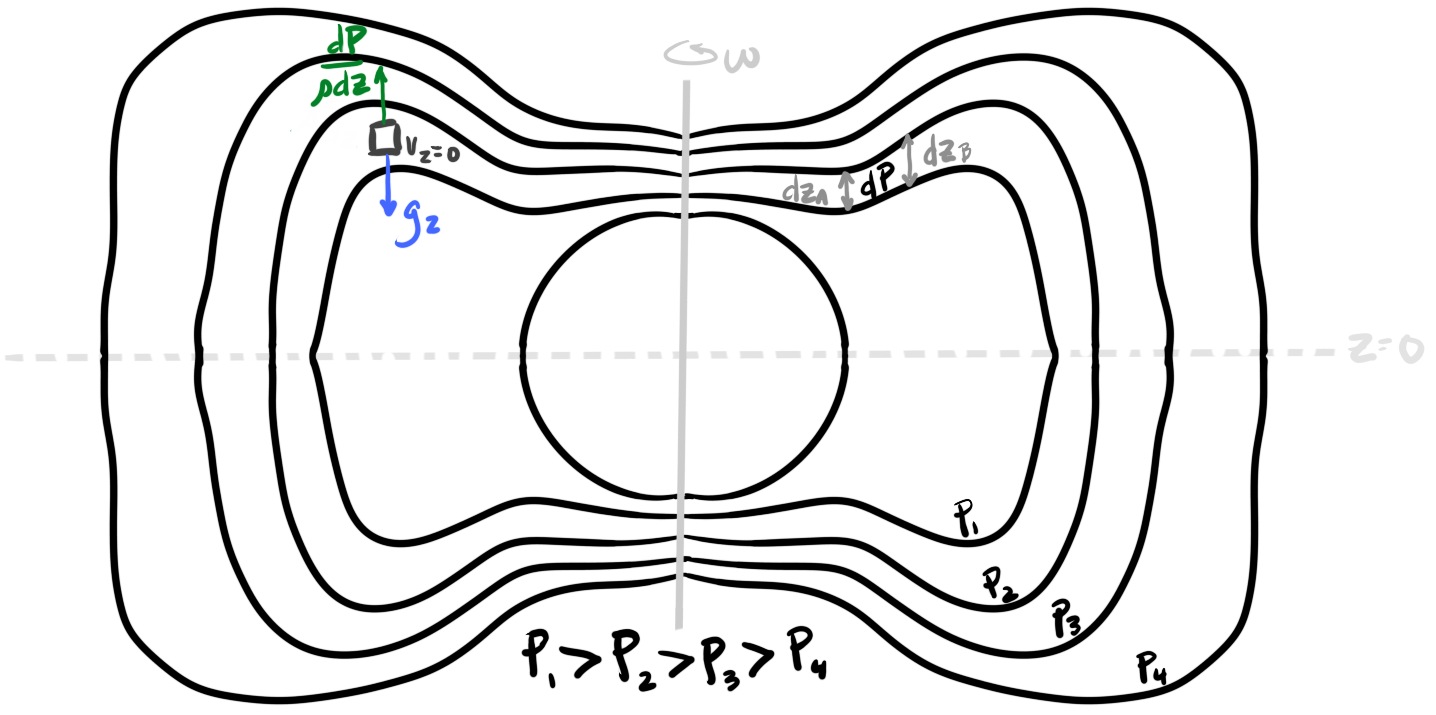

<i>Caption</i>. A parcel of fluid in a synestia (dark grey square, upper left) is in hydrostatic equilibrium in z if its gravitational (g$_z$) and pressure forces (dP/$\rho$ dz) are equal. The black contours represent surfaces of constant pressure, where contours farthest from the origin have the lowest pressure values. Hydrostatic equilibrium defines the curvature of the pressure contours, which give synestias their flared shape. Credit: G. O. Hollyday.

The z component of the pressure gradient allows a particle to orbit at the same z. In other words, gas parcels experience <i>hydrostatic equilibrium</i> in the z direction. The gravitational pull towards the midplane due to a parcel of gas is balanced by the vertical pressure gradient. Gas parcels will not move in the z direction; they have zero movement in z. Hydrostatic equilibrium in z follows this equation:

$$\frac{dP}{dz} = -\rho g_z = -\rho(r_{xy}, z)\frac{GMz}{r^3}\left(1 - \frac{3J_2a_{eq}^2}{r^2}\left(\frac{2.5z^2}{r^2} - 1.5\right)\right)$$

where g$_z$ is the z component of the gravitational acceleration acting at a particular location r = (x, y, z) in a synestia with equatorial radius a$_{eq}$, total mass M, and J$_2$ factor based on its mass distribution (oblateness).

The magnitude of the pressure gradient in z of the gas in a synestia will change according to the magnitude of the gas density and gravitational acceleration in z at a particular r$_{xy}$ = (x,y), z location. The pressure gradient term in the balance of forces in a synestia causes a synestia to flare, taking on a disk-like shape.

<i>Pressure contours</i>, or constant pressure surfaces, define a synestia's flared shape. You can think of a synestia's pressure field as many nested pressure contours, like Matryoshka nesting dolls, where the innermost contour has the highest pressure and the outermost contour has the lowest pressure. The difference in pressure between contours creates a pressure gradient.

A synestia is in hydrostatic equilibrium in z in its moon-forming region, so vertical pressure gradient forces are balanced by gravitational attraction towards the midplane. To first order, gravity decreases by r$^{-2}$ with increasing radial distance from the center of a synestia. Pressure and density gradients decrease exponentially with distance from a synestia's rotational axis. For a given z, the values of $\rho$ and g will be lower at a larger r$_{xy}$.

Say we picked two pressure contours in a synestia, where dP is the difference in pressure between the two (see image above). If we selected some cylindrical radius r$_{xy,A}$, where $\rho_A$ is the density and g$_A$ is the gravitational acceleration at the higher pressure contour, then the vertical distance between the two pressure contours would be dz$_A$. If we then focused on a larger cylindrical radius r$_{xy,B}$, where r$_{xy,B}$ $>$ r$_{xy,A}$, then the density and gravitational acceleration at the higher pressure contour would be smaller such that $\rho_B$ $<$ $\rho_A$ and g$_B$ $<$ g$_A$. To maintain hydrostatic equilibrium, the distance between the pressure contours must increase so that dz$_B$ $>$ dz$_A$.

This results in a flared pressure contour. As cylindrical radius increases linearly, the increase in the distance between the pressure contours is not linear. Gravitational forces decrease with increasing cylindrical radius more quickly than pressure forces do, allowing fluid at a given pressure to settle into hydrostatic equilibrium at increasingly higher z for greater r$_{xy}$.